In [8]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

## Simple Graph to understand working/Syntax of LangGraph.

We will make a BMI calculator using two states weight and height and then create a result of it.


**Steps Involved**

1. Create States using a class
2. Create Graph Object of our class
3. Add Nodes to Graph
4. Add Edges to Graph
5. Complie and Check the Graph


In [4]:
# define states


class BMIState(TypedDict):
    weight_kg: float
    height_m: float
    bmi: float

In [5]:
# Create graph

graph_obj = StateGraph(BMIState)

> Now internally all nodes are python functions so we need to specify the function name for each nodes


In [6]:
# This function will recieve the graph state
# And after finishing the task it will also return the state


"""
We will recieve the weight and height from state.
Update the state.
Return the state.
"""


def calculate_bmi(state: BMIState) -> BMIState:
    weight = state["weight_kg"]
    height = state["height_m"]

    bmi = weight / (height**2)

    # Now update the bmi value in state which will get return
    state["bmi"] = round(bmi, 2)

    return state

In [7]:
# We need to create node with the function name

# graph_obj.add_node(name,function)
graph_obj.add_node("final_bmi", calculate_bmi)

> Since we have a simple workflow we only have two edges

> `starte --> calulate bmi --> end`


In [9]:
# create edge

# graph_obj.add_edge(start,end)
graph_obj.add_edge(START, "final_bmi")
graph_obj.add_edge("final_bmi", END)

> Make sure to compile and check the structure of the graph is it logically correct or not.


In [10]:
# Compile the graph : This will return a compile object
workflow = graph_obj.compile()

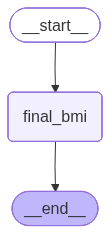

In [11]:
workflow

In [13]:
# Execute the graph

workflow.invoke({"weight_kg": 52, "height_m": 1.72})

{'weight_kg': 52, 'height_m': 1.72, 'bmi': 17.58}

In [14]:
"""
Since final output is also a state so we can write it this way in much better way
"""

initial_state = {"weight_kg": 52, "height_m": 1.72}
final_state = workflow.invoke(initial_state)
print(final_state)

{'weight_kg': 52, 'height_m': 1.72, 'bmi': 17.58}


## Lets make this workflow More Complex.

Based on the final value we get, we need to identify whether the person is obese, underweight, overwieght etc.


In [27]:
class BMIState(TypedDict):
    weight_kg: float
    height_m: float
    bmi: float
    category: str

In [28]:
graph_obj = StateGraph(BMIState)

In [29]:
def calculate_bmi(state: BMIState) -> BMIState:
    weight = state["weight_kg"]
    height = state["height_m"]

    bmi = weight / (height**2)

    # Now update the bmi value in state which will get return
    state["bmi"] = round(bmi, 2)

    return state

In [30]:
def label_bmi(state: BMIState) -> BMIState:
    bmi = state["bmi"]

    if bmi < 18.5:
        state["category"] = "Under weight"
    elif 18.5 <= bmi < 25:
        state["category"] = "Normal"
    elif 25 <= bmi < 30:
        state["category"] = "Over Weight"
    else:
        state["category"] = "Obese"

    return state

> Now in this we have 2 nodes and three edges


In [31]:
graph_obj.add_node("final_bmi", calculate_bmi)
graph_obj.add_node("body_type", label_bmi)

In [32]:
graph_obj.add_edge(START, "final_bmi")
graph_obj.add_edge("final_bmi", "body_type")
graph_obj.add_edge("body_type", END)

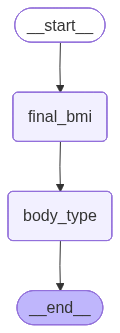

In [33]:
workflow = graph_obj.compile()
workflow

In [42]:
initial_state2 = {"weight_kg": 70, "height_m": 1.72}
result = workflow.invoke(initial_state2)

In [43]:
result

{'weight_kg': 70, 'height_m': 1.72, 'bmi': 23.66, 'category': 'Normal'}